# Diabetes Dataset: Linear model

Oscar Miranda Escalante A01630791

In [1]:
import sys
sys.path.append('/Users/oscar/Local/diabetes_model')

In [2]:
import torch
import matplotlib.pyplot as plt
import numpy as np

from modules.dataset import DiabetesDataset

torch.manual_seed(0)

In [3]:

device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)

# force cpu (mps not compatible)
device = "cpu"

print(f"Using {device} device")

Using cpu device


## Load the data

In [4]:
path = '../data/diabetes.txt'
drop_cols = ['S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'SEX', 'AGE']
# drop_cols = []
diabetes_dataset = DiabetesDataset(path=path, drop=drop_cols, normalize=True)

# Train/test split
train_size = int(0.8 * len(diabetes_dataset))
test_size = len(diabetes_dataset) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(diabetes_dataset, [train_size, test_size])

## Model definition

In [5]:
class LinearRegression(torch.nn.Module):
    def __init__(self, in_features, out_features) -> None:
        super(LinearRegression, self).__init__()
        self.linear = torch.nn.Linear(in_features, out_features)

    def forward(self, x):
        out = self.linear(x)
        return out

In [6]:
# Feature dimensions
x_features = len(diabetes_dataset[0][0])
y_features = 1

# Instantiate model
model = LinearRegression(x_features, y_features).to(device)

## Training

In [7]:
def train(data, n_epochs, criterion, optimizer, loss_history):
    X_train, y_train = data[:]

    for epoch in range(n_epochs):
        optimizer.zero_grad()
        
        # Forward
        y_hat = model(X_train)

        # Loss
        loss = criterion(y_hat, y_train)
        loss_history.append(loss.item())

        # Gradients
        loss.backward()

        # Update params
        optimizer.step()

        print(f'epoch {epoch+1}, loss {loss.item()}')

Using SGD optimizer

In [8]:
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)
mse_history = []

train(train_dataset, 20, criterion, optimizer, mse_history)


epoch 1, loss 28828.697265625
epoch 2, loss 19468.689453125
epoch 3, loss 13614.4560546875
epoch 4, loss 9938.5859375
epoch 5, loss 7622.46728515625
epoch 6, loss 6158.56396484375
epoch 7, loss 5230.7041015625
epoch 8, loss 4641.09619140625
epoch 9, loss 4265.53564453125
epoch 10, loss 4025.7744140625
epoch 11, loss 3872.368896484375
epoch 12, loss 3773.9970703125
epoch 13, loss 3710.77099609375
epoch 14, loss 3670.033935546875
epoch 15, loss 3643.716796875
epoch 16, loss 3626.66455078125
epoch 17, loss 3615.57958984375
epoch 18, loss 3608.3466796875
epoch 19, loss 3603.60693359375
epoch 20, loss 3600.486083984375


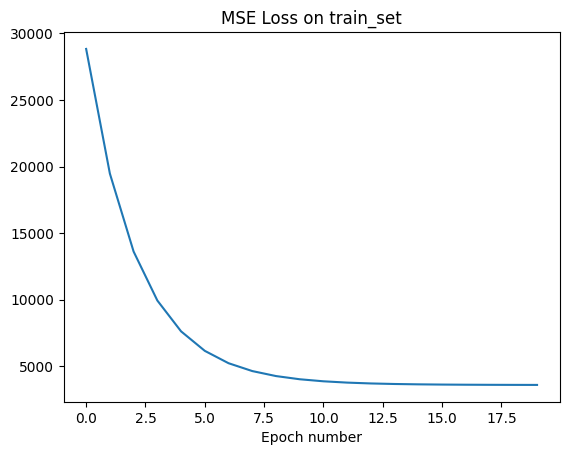

In [9]:
plt.title("MSE Loss on train_set")
plt.xlabel("Epoch number")
plt.plot(mse_history)

## Testing

Mean Squared Error (MSE) using test_set: 3547.5186
Root Mean Squared Error (RMSE) using test_set: 59.5611


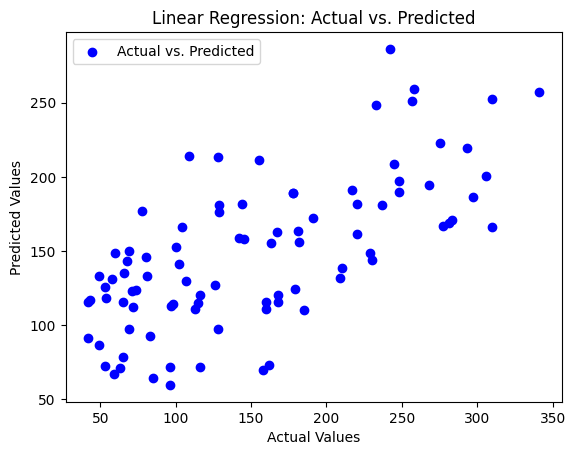

In [10]:
with torch.no_grad():
    X_test, y_test = test_dataset[:]
    y_hat = model(X_test)
    mse = criterion(y_hat, y_test)
    rmse = np.sqrt(mse)

    print(f"Mean Squared Error (MSE) using test_set: {mse.item():.4f}")
    print(f"Root Mean Squared Error (RMSE) using test_set: {rmse:.4f}")

    plt.scatter(y_test, y_hat, color='blue', label='Actual vs. Predicted')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Linear Regression: Actual vs. Predicted')
    plt.legend()
    plt.show()